In [1]:
import warnings 
warnings.filterwarnings("ignore")

PRINCIPAL COMPONANT ANALYSIS

In [2]:
# Despite of availibility of high-end hardware (CPU AND GPU) , there are still various factors that cause 
# that cause performance bottlenecks while developing machine learning algorithms for classificaiton and
# regression
#--> One of such issue is related to large number of feature in the dataset 
# one of the solution to this problem is dimentionality reduction

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
X = np.array([[1 , 3, 5,7 , 9 ,13 ,20 , 20, 21, 24 ,26],[5, 7 , 11, 14, 15, 17 , 18 ,19 ,21, 22, 26]])
X = X.T #<-- the data matrix
print(X)

[[ 1  5]
 [ 3  7]
 [ 5 11]
 [ 7 14]
 [ 9 15]
 [13 17]
 [20 18]
 [20 19]
 [21 21]
 [24 22]
 [26 26]]


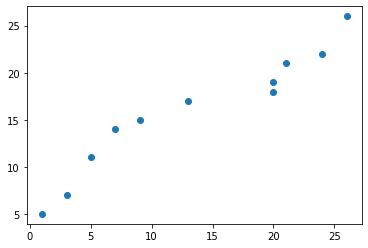

In [4]:
# apply pca to the above 2d data and reduce it to 1 dimentional data
plt.scatter(X[: , 0] ,X[: ,1] ) # plotting 

In [5]:
# preprocessing (mean shifting)

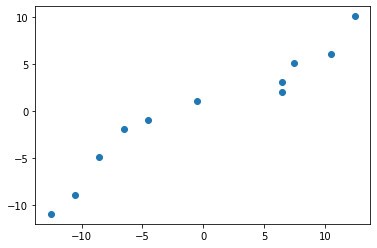

In [6]:
X_meand = X - np.mean(X , axis  =0 )
plt.scatter(X_meand[: ,0] , X_meand[: ,1]) # plotting the mean shifted data
# plt.scatter(X[: , 0 ] , X[:, 1]) # comparision

In [7]:
# the covariance matrix

In [8]:
C  = np.cov(X_meand , rowvar=False) 
print(C)

[[80.87272727 54.95454545]
 [54.95454545 40.69090909]]


In [9]:
# computing the eigenvalues and eigenvectors of the covariance matrix 

In [10]:
eval, evec  = np.linalg.eig(C)
print(eval)
print(evec)

[119.29375452   2.26988184]
[[ 0.81956216 -0.57299028]
 [ 0.57299028  0.81956216]]


In [11]:
sorted_index = np.argsort(eval)[::-1] #  arg sort returns the indices that would sort the array
sorted_eval  = eval[sorted_index]
sorted_evec  = evec[: , sorted_index]
sorted_evec # sorted eigenvectors in order of descending eigenvalues

array([[ 0.81956216, -0.57299028],
       [ 0.57299028,  0.81956216]])

In [12]:
n = 1 # how many eigenvectors  we want 
evec_subset = sorted_evec[: , 0:n]
print(evec_subset)

[[0.81956216]
 [0.57299028]]


In [13]:
# transform the data 

In [14]:
X_reduced = np.dot(evec_subset.transpose() , X.transpose()).transpose()

In [15]:
print(X_reduced) # one dimensional representation of the orignal data

[[ 3.68451355]
 [ 6.46961844]
 [10.40070388]
 [13.75879904]
 [15.97091365]
 [20.39514286]
 [26.70506829]
 [27.27805857]
 [29.24360129]
 [32.27527806]
 [36.2063635 ]]


In [16]:
# reconstruction of data from one eigenvector

In [17]:
X_recon = X_reduced.dot(evec_subset.T)
print(X_recon)

[[ 3.0196879   2.11119044]
 [ 5.30225449  3.70702846]
 [ 8.52402338  5.9595022 ]
 [11.27619112  7.88365808]
 [13.08915656  9.15117825]
 [16.71508743 11.68621857]
 [21.88646357 15.3017445 ]
 [22.35606473 15.63006235]
 [23.96694917 16.75629922]
 [26.45159675 18.49342054]
 [29.67336564 20.74589428]]


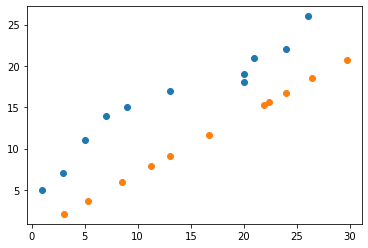

In [18]:
plt.scatter(X[: , 0] , X[: ,1])
plt.scatter(X_recon[: ,0] , X_recon[: ,1])

In [19]:
#using direct functionality of sklearn

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1) # the arguement is how many dimensions we want 

In [21]:
pca.fit(X_meand)# input the shifted data ?, this method will learn the eigenvalues and eigenvectors

PCA(n_components=1)

In [22]:
Xr = pca.transform(X) # this method will project the data onto the reduced dimensional space 

In [23]:
Xr # one dimensional representation

array([[ -3.68451355],
       [ -6.46961844],
       [-10.40070388],
       [-13.75879904],
       [-15.97091365],
       [-20.39514286],
       [-26.70506829],
       [-27.27805857],
       [-29.24360129],
       [-32.27527806],
       [-36.2063635 ]])

In [24]:
pca.components_

array([[-0.81956216, -0.57299028]])

In [25]:
pca.components_.T.dot(Xr.T).T 
#reconstruction of the orignal dataset from one eigenvector

array([[ 3.0196879 ,  2.11119044],
       [ 5.30225449,  3.70702846],
       [ 8.52402338,  5.9595022 ],
       [11.27619112,  7.88365808],
       [13.08915656,  9.15117825],
       [16.71508743, 11.68621857],
       [21.88646357, 15.3017445 ],
       [22.35606473, 15.63006235],
       [23.96694917, 16.75629922],
       [26.45159675, 18.49342054],
       [29.67336564, 20.74589428]])

In [26]:
# PCA on the iris dataset 

In [27]:
from sklearn.datasets import load_iris
iris  = pd.DataFrame(load_iris().data , columns=[load_iris().feature_names])
iris_target = pd.DataFrame(load_iris().target , columns = ["class"])
# the iris dataset is a 4d dataset 
# we want to reduce the dimension to 2

In [28]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [29]:
from sklearn.decomposition import PCA
pc_a = PCA(n_components=2)
mean_shifted = np.array(iris)  - np.mean(np.array(iris) , axis =0 )
pc_a.fit(mean_shifted)
l =pc_a.transform(iris)

<AxesSubplot:>

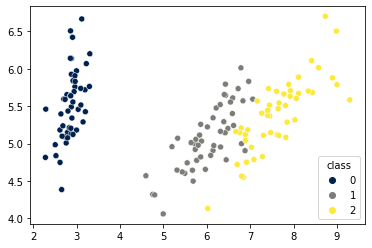

In [30]:
sns.scatterplot(l[: ,0] ,l[:,1] , hue=iris_target["class"], palette=  "cividis")
# 2d representaion of the orignal 4d dataset

LINEAR DISCRIMINANT ANALYSIS

In [31]:
# computing the scatter matrices "sw"
# this is the correct way of computing the within class scatter matrix

In [3]:
c1  = np.matrix([[4,1] , [2 ,4] , [2 , 3 ] , [3 , 6] , [4 ,4]])
c2  = np.matrix([[9,10] , [6 ,8] , [9 ,5 ] , [8,7] , [10 ,8]])

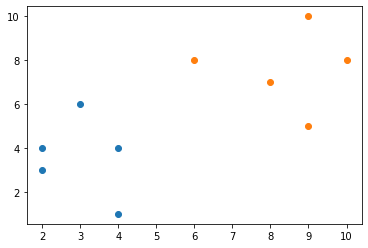

In [4]:
plt.scatter(np.array(c1[:,0]) ,np.array(c1[:,1]))
plt.scatter(np.array(c2[:,0]) ,np.array(c2[:,1]))

In [5]:
mean_vector1 = np.mean(c1 , axis=0) # mean vector for class1
mean_vector2 = np.mean(c2 ,axis =0) # mean vector for class2 

In [6]:
a = np.zeros((2,2))
for i in range(len(c1)):
    a += np.dot(c1[i , :].T - mean_vector1.T , np.transpose(c1[i , :].T - mean_vector1.T))
# variable a contains the class c1 scatter matrix 

In [7]:
b = np.zeros((2,2))
for i in range(len(c2)):
    b += np.dot(c2[i , :].T - mean_vector2.T , np.transpose(c2[i , :].T - mean_vector2.T))
# b contains the class c2 scatter matrix 

In [9]:
sw  = a + b  # sw is the within class scatter matrix 
inv_sw = np.linalg.inv(sw)
opt = np.dot(inv_sw,mean_vector1.T -mean_vector2.T) # gives the  optimal projection direction
print(sw)# the answer is s tallying with this approach
print(opt)

[[13.2 -2.2]
 [-2.2 26.4]]
[[-0.44046095]
 [-0.18822023]]


In [14]:
4 * np.cov(c1 ,rowvar=False) + 4 *np.cov(c2 ,rowvar =False) # and also this also
# (n-1)*cov(c1)  + (n-1) * cov2

array([[13.2, -2.2],
       [-2.2, 26.4]])

In [8]:
# the lecture code snippets are below 

In [39]:
# lDA projects the data in a direction which provides maximum inter-class seperability

- another important thing for LDA  is that we can reduce the data only upto "n-1" dimensions
- where n : no of classess in the dataset
- ex: we have 100d dimensional data with 5 classess we can reduce the dimension of the data only upto 4     dimensions  and not 3, 2 ,1 and so on 

In [40]:
#utilities
import numpy as np 
import matplotlib.pyplot as plt 

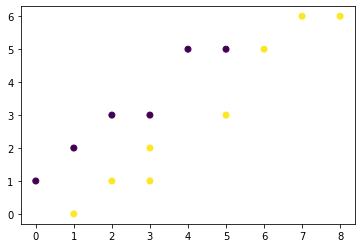

In [41]:
# define the dataset
X = np.array([[0 ,1 , 2,3, 4, 5, 1,2, 3,3 ,5, 6 , 7, 8],[1, 2, 3, 3, 5,5,0,1,1,2,3,5,6,6]])
y = np.array([0 , 0, 0, 0 , 0, 0 , 1, 1,1,1,1,1,1,1]) 
X = X.T
plt.scatter(X[:, 0], X[:,1] ,c= y) # the c arguement stands for class information

In [42]:
# firt applying pca on this dataset
# and check whether linear seperablity is maintained 

In [43]:
X_meanshift = X - np.mean(X , axis =0)
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(X_meanshift)
Xrr = pca.transform(X) # one dimensional represention of the orignal data
dir_pca = pca.components_.T

In [44]:
dir_pca

array([[0.76976202],
       [0.63833097]])

In [57]:
# reconstructing the data from only one eigenvector(projecting data on the direction given by PCA)

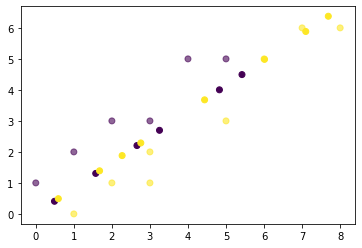

In [58]:
rec_Xrr = dir_pca.dot(Xrr.T).T # reconstructed data 
plt.scatter(X[:, 0], X[:,1] ,c= y , alpha = 0.6) 
plt.scatter(rec_Xrr[:,0] ,rec_Xrr[:,1] ,c =y , alpha = 1)
# we can see that in 1 dimensional representation we are having mixed clusters , we cannot have linerly seperable 
# data after projection , PCA is not preserving linear seprability although the original data is linearly seperable

In [47]:
# to get rid of the problem we will apply LDA

In [59]:
# import utilities 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X , y) # y is the class information

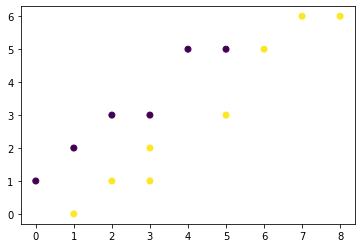

In [61]:
plt.scatter(X[:, 0] , X[:,1], c = y)

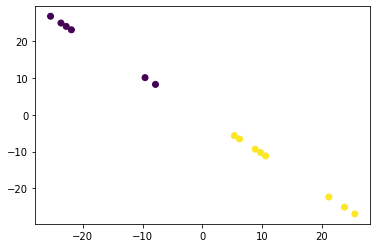

In [49]:
a = lda.coef_.T.dot(X_lda.T).T
plt.scatter(a[:,0] , a[:,1] , c =y)
# we can see that by using the method of linear Discriminat Analysis,
# the linear seperability property of original high dimensional dataset is preserved even after projection
# so in one dimensional representation also the data is linearly seprable

In [120]:
# working on benchmark dataset 

In [74]:
from sklearn.datasets import load_wine
import pandas as pd 
wine = load_wine()
X=np.array(wine.data)
y=np.array(wine.target)
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

- the wine dataset is 13 dimensional , we will reduce it to 2 dimensional dataset using LDA.
- (2 is the maximum possible dimension we  can reduce the data upto)

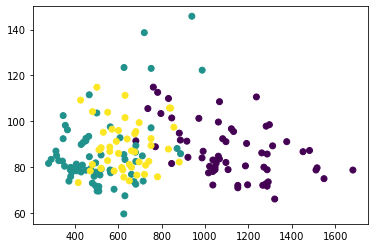

In [121]:
# first applying PCA 
X_meanshifted = X - np.mean(X , axis =0)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_meanshifted)
z=pca.transform(X)# 2d representation using PCA
# plotting the result
plt.scatter(z[:, 0] , z[:, 1], c = y)
# they are claiming that the data in original 13 dimensional spcace is linearly seperable . but after 
# projection it's no longer linearly seperable in 2d space.

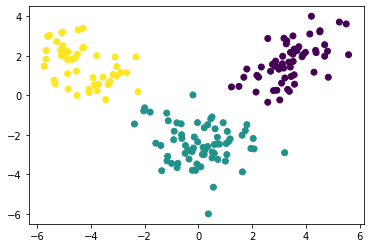

In [122]:
# apply LDA to overcome issue
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X ,y)
Z_lda = lda.transform(X ) # 2d representation using LDA
# plotting the results
plt.scatter(Z_lda[:, 0] ,Z_lda[:, 1],c =y)
# we can see that by using LDA the linearseprablity property is preserved after projection onto 2d space 

In [115]:
# classifying the 2d representation of data  

In [5]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train ,y_test = train_test_split(X , y  ,test_size = 0.3)
lda.fit(X_train , y_train)
yn = lda.predict(X_test)

NameError: name 'X' is not defined

In [3]:
print(y_test)
print(yn)
print(y_test-yn) # ideally should be a sparse vector  

NameError: name 'y_test' is not defined